In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
data_df=pd.read_csv("data.csv")
test_df=pd.read_csv("test.csv")

In [3]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_df.shape

(42000, 785)

In [6]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [7]:
x_for_test_data=test_df[:]

In [8]:
type(x)

pandas.core.frame.DataFrame

1


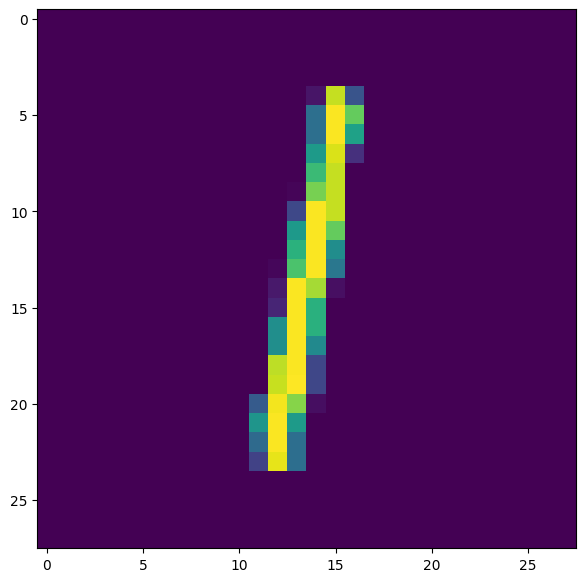

In [9]:
plt.figure(figsize=(7,7))
some_digit=1267
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

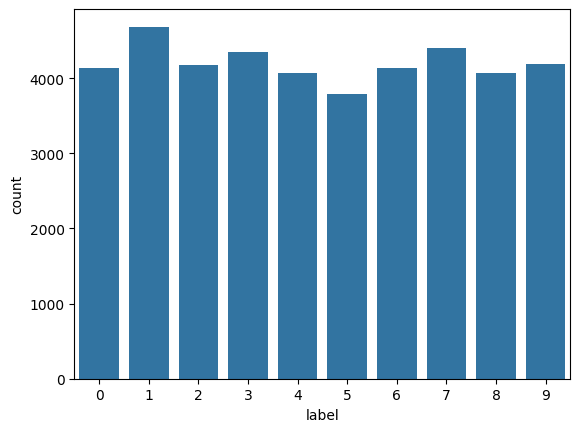

In [10]:
sns.countplot( x='label', data=data_df) 

In [11]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 40)

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12600, 784), (12600,), (29400, 784), (29400,))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train=scaler.transform(x_train)
x_test= scaler.transform(x_test)
x_train.shape

(12600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
ratio='70:30'
K=5
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 1])

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [16]:
print(f"\nRatio: {ratio}, K: {K}")


Ratio: 70:30, K: 5


In [17]:
print(accuracy_score(y_test,y_pred))

0.9191836734693878


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2860
           1       0.91      0.99      0.95      3258
           2       0.95      0.90      0.92      2947
           3       0.89      0.93      0.91      3104
           4       0.92      0.90      0.91      2835
           5       0.90      0.89      0.90      2659
           6       0.95      0.96      0.96      2898
           7       0.92      0.90      0.91      3087
           8       0.95      0.85      0.90      2823
           9       0.87      0.88      0.88      2929

    accuracy                           0.92     29400
   macro avg       0.92      0.92      0.92     29400
weighted avg       0.92      0.92      0.92     29400



In [19]:
print(confusion_matrix(y_test,y_pred))

[[2806    3    6    5    3   10   19    2    5    1]
 [   3 3225    6    4    3    2    8    3    2    2]
 [  39   66 2657   71   21    0   30   32   25    6]
 [  14   21   34 2880    3   51    4   36   44   17]
 [   5   64   24    9 2561   17   11   13    1  130]
 [  21   28    7  116   19 2369   50    9   17   23]
 [  53   12   10    7   12   18 2781    0    5    0]
 [   6   61   14   19   34    0    0 2767    3  183]
 [  33   49   36   76   35  145   10   12 2386   41]
 [  22   14   13   38   92   10    0  136   12 2592]]


In [20]:
ratios = [0.60, 0.70, 0.75, 0.80, 0.90, 0.95]
k_values = [2, 4, 5, 6, 7, 10]
results=[]
for ratioo in ratios:
    for k in k_values:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratioo, random_state=40)
        
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(x_train_scaled, y_train)
        
        y_pred = classifier.predict(x_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        cr = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        print(f"\nRatio: {ratioo}, K: {k}")
        print(f"Accuracy: {accuracy}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        results.append({
            'Ratio': ratioo,
            'K': k,
            'Accuracy': accuracy,
            'Classification Report': cr,
            'Confusion Matrix': cm
        })



Ratio: 0.6, K: 2
Accuracy: 0.9073015873015873

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2443
           1       0.91      0.99      0.95      2800
           2       0.89      0.92      0.91      2509
           3       0.86      0.92      0.89      2693
           4       0.87      0.93      0.90      2401
           5       0.88      0.88      0.88      2288
           6       0.97      0.93      0.95      2465
           7       0.90      0.92      0.91      2660
           8       0.96      0.78      0.87      2432
           9       0.94      0.80      0.86      2509

    accuracy                           0.91     25200
   macro avg       0.91      0.91      0.91     25200
weighted avg       0.91      0.91      0.91     25200


Confusion Matrix:
[[2408    2    7    4    2    7   10    1    2    0]
 [   2 2782    8    0    1    1    1    2    2    1]
 [  50   62 2312   32   14    2   16   11    

In [21]:
results_df = pd.DataFrame(results)

In [22]:
results_df.to_csv('results.csv', index=False)

In [23]:
print(results_df)

    Ratio   K  Accuracy                              Classification Report  \
0    0.60   2  0.907302  {'0': {'precision': 0.91350531107739, 'recall'...   
1    0.60   4  0.921508  {'0': {'precision': 0.9338006230529595, 'recal...   
2    0.60   5  0.924444  {'0': {'precision': 0.9436342136381553, 'recal...   
3    0.60   6  0.923095  {'0': {'precision': 0.9406912804399057, 'recal...   
4    0.60   7  0.923571  {'0': {'precision': 0.944729569680221, 'recall...   
5    0.60  10  0.919563  {'0': {'precision': 0.939417781274587, 'recall...   
6    0.70   2  0.902041  {'0': {'precision': 0.9056056701030928, 'recal...   
7    0.70   4  0.915544  {'0': {'precision': 0.9276989105315285, 'recal...   
8    0.70   5  0.919184  {'0': {'precision': 0.9347101932045303, 'recal...   
9    0.70   6  0.917551  {'0': {'precision': 0.9301324503311258, 'recal...   
10   0.70   7  0.917823  {'0': {'precision': 0.9355162044771133, 'recal...   
11   0.70  10  0.911735  {'0': {'precision': 0.9295212765957447,